# Support Vector Machine, SVM
# 0. 소개
- 이진 분류 해결에 사용
    - 회귀에도 사용되는 학습 모델
- 각 클래스의 데이터를 분리하는 가장 좋은 결정 경계(초평면)을 찾음
- 데이터를 고차원 공간으로 변환하여, 선형적으로 분리 가느한 초평면을 찾음
- 
- 데이터 스케일에 민감하므로, 입력 데이터 정규화가 중요
## 1. 개념
- 두 클래스 간 경계(초평면)를 찾는 알고리즘
- 초평면은 두 클래스 사이의 마진을 최대화하는 방향으로 설정(마진의 역수를 최소화하는 방향)
### 단어
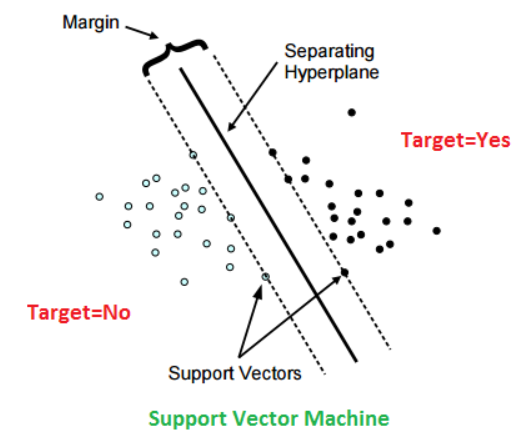
- 초평면Hyperplane or  결정 경계
    - N차원 공간에서 N-1차원 평균을 의미
    - 두 클래스의 데이터를 최대한 멀리 떨어지도록 분리
    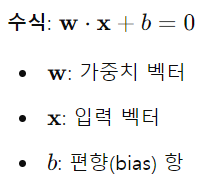
- 서포트 벡터 Support Vector 
    - 결정 경계에 가장 가까이 위치한 데이터 포인트들
    - 이 포인트들은 결정 경계를 정의하는 중요한 역할
- 마진 Margin
    - 결정 경계와 서포트 벡터 사이의 거리
    - 마진을 최대화 하여 분류기의 일반화 성능을 높임
    - 마진이 클수록 일반화 성능 좋음
    - 마진의 크기
        - 서포트 벡터와 결정 경계 사이의 거리
- 소프트 마진 Soft Margin
    - 모든 데이터 포인트가 결정 경계 바깥에 있도록 강요하지 않고. 일부 데이터 포인트가 잘못 분류되는 것을 허용하는 방법
    - 과적합 방지, 일반화 성능 향상
- 슬랙 변수 Slack Variable
    - 데이터를 적절하게 분류하지 못한 정도를 나타내는 변수
    - 소프트 마진 SVM 사용
## 2. 커널 트릭 Kernel Trick
- 커널 함수를 사용하여 데이터를 고차원 공간으로 매핑
- 선형적으로 분리되지 않는 데이터 변환
- 비선형 데이터에 대해서도 선형적으로 분리 가능한 포평면 찾을 수 있음
## 3. 장점
- 고차원 공간에서 효율적으로 작동
- 적은 서포트 벡터로 강력한 분류 성능 
- 다양한 커널 함수를 이용해 비선형 데이터 처리
## 4. 단점
- 큰 데이터 셋에서 계산 비용이 높아지고, 복잡해짐
- 커널 함수와 정규화 상수 C 등의 파라미터 튜닝 필요

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 파일 탐색
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
# 데이터 로드
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# 특성 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# SVM 분류기 생성 및 학습
svm = SVC(kernel='linear')  # 'linear', 'poly', 'rbf', 'sigmoid' 등 다양한 커널을 사용할 수 있습니다.
svm.fit(X_train, y_train)

SVC(kernel='linear')

### 혼동 행렬 Confusion Matrix
- 분류 모델의 성능을 평가하기 위한 도구
- 실제 클래스와 예측된 클래스 간의 매트릭스를 나타냄
### 분류 보고서 Classification Report
- 분류 모델의 성능을 평가하는 다양한 메트릭(정밀도, 재현율, F1-score 등) 제공
    - 정밀도 precision : 모델이 양성으로 예측한 샘플 중 실제로 양성인 샘플의 비율

    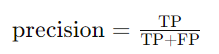

    - 재현율 recall : 실제 양성 샘플 중 모델이 양성으로 올바르게 예측한 샘플의 비율

    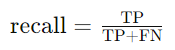

    - F1-score : 정밀도와 재현율의 조화 평균

    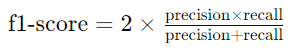
    
    - 정확도 accuracy : 전체 샘플 중 모델이 올바르게 예측한 샘플의 비율
    
    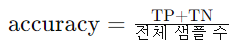

In [16]:
# 예측
y_pred = svm.predict(X_test)

# 평가 
print(confusion_matrix(y_test, y_pred), '---')
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]] ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



### 결과 해석
- confusion_matrix
    - 각 행은 클래스, 각 숫자는 해당 클래스에 정확히 예측된 샘플 수
    - 첫 행은 클래스 0번으로, 19개의 샘플이 0번 클래스에 올바르게 예측
    - 두번째 행은 클래스 1번, 12개의 샘플이 올바르게 클래스 1에 예측됐고, 1개의 샘플이 클래스 2로 잘못 예측됨
- classification report
    - 각 클래스의 정밀도, 재현율, F1_score의 수치가 높게 나왔음
    - 전체 정확도 역시 0.98로 높음